# Model Performance on Data from Different Sources

In this notebook, we evaluated the cross dataset accuracy of the trained classifiers.

There are 15 different data sources.
For each data source, we trained a classifier using a training sample from the data source.
For evaluation, we use each classifier to predict the labels of 15 new samples from each data sources.
Finally, we organize the model accuracy on each sample sets into a 15x15 matrix.

`~/temp.txt` contains the AUROC scores of the cross testing results.

```
$ cat ~/temp.txt
AGSO, 0.9683584502134357, 0.8083547935928221, 0.6535804868850993, 0.3302410232685176, 0.6901478331030504, 0.5675202664253837, 0.5461459758322657, 0.8200191511400459, 0.6376210242358391
JAMSTEC, 0.7345712958874826, 0.9940613071095443, 0.869615294418662, 0.8244811670921242, 0.8855974525738259, 0.704835576411309, 0.5889731608052143, 0.882004411617103, 0.8326129800091713
JAMSTEC2, 0.7878832022963775, 0.7460047193175519, 0.9620317526313029, 0.7377238547148128, 0.6082179741537473, 0.48404436813787505, 0.48668940473281846, 0.8088413646299425, 0.5852864048790749
NGA, 0.7143877207069638, 0.8932204470084182, 0.5820019096494589, 0.9906932121363677, 0.6891325947487713, 0.6304488843805969, 0.7698814722856311, 0.7942442708920239, 0.7071009630287516
NGA2, 0.6876273641527131, 0.8513726450490211, 0.8612439939713046, 0.7477403876424769, 0.999145281802935, 0.7740426180250303, 0.710056577742518, 0.7311250531552633, 0.5975480990812645
NGDC, 0.7519666089867197, 0.9021209362452757, 0.8122511841238769, 0.5373989480120451, 0.9214942212120916, 0.9320375800706934, 0.5955573408174857, 0.8538932784578321, 0.7214534370374897
NOAA_geodas, 0.7629480457600294, 0.87710495037055, 0.9226040885895593, 0.9015873093943559, 0.6910522551470479, 0.6596911950650174, 0.955894682959222, 0.8985709450847397, 0.724139818376027
SIO, 0.6965380574474506, 0.9196858359537714, 0.8915986015107289, 0.7421291918597132, 0.8863058758285456, 0.5798962013841179, 0.6519227520490953, 0.9945563432281871, 0.7133887517469162
US_multi, 0.709655022217568, 0.9627796797916994, 0.873592137838104, 0.785816470398812, 0.8877934894796067, 0.7958022691727162, 0.651267045417127, 0.9085593289832646, 0.9412093536413119
```

Each line corresponds to the tests using one model trained on the data from the research institution in the first column.

In [2]:
import pandas as pd
import numpy as np
from io import StringIO
from os.path import expanduser


with open(expanduser("~/temp.txt")) as f:
    lines = [line.split(",") for line in f.readlines()]

regions = [line[0] for line in lines]
mat = [list(map(lambda t: float(t), line[1:])) for line in lines]
print(regions)

# Reorder

regions_mapping = {t: index for index, t in enumerate(regions)}
new_regions = ['AGSO', 'NOAA_geodas', 'NGA', 'NGA2', 'NGDC', 'JAMSTEC', 'JAMSTEC2', 'SIO', 'US_multi']

new_mat = []
for i, r1 in enumerate(new_regions):
    new_mat.append([0.0] * len(new_regions))
    for j, r2 in enumerate(new_regions):
        new_mat[i][j] = mat[regions_mapping[r1]][regions_mapping[r2]]

In [50]:
# To not have axis labels overlap with each other
new_regions[1] = "NOAA"
new_regions[5] = "JAM1"
new_regions[6] = "JAM2"

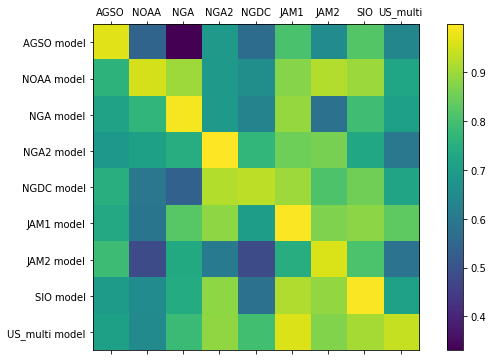

In [51]:
%matplotlib inline

from matplotlib import pyplot as plt

if True:
    THRESHOLD = 0.5
    mat = np.clip(new_mat, THRESHOLD, 1.0)

fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(new_mat)
fig.colorbar(cax);

ax.set_yticklabels([''] + [s + " model" for s in new_regions])
ax.set_xticklabels([''] + new_regions);